In [17]:
import cv2 
import matplotlib.pyplot as plt 

In [18]:
def show_with_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(14,8))
plt.suptitle("Sobel Operator & cv2.addWeighted() to show the output", fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Sobel Operator & cv2.addWeighted() to show the output')

<Figure size 1008x576 with 0 Axes>

In [19]:
image = cv2.imread("images/lenna.png")

In [20]:
image_filtered = cv2.GaussianBlur(image, (3, 3), 0)

In [21]:
gray_image = cv2.cvtColor(image_filtered, cv2.COLOR_BGR2GRAY)

In [22]:
#Gradient X is calculated
#the depth of the output is set to CV_16S to avoid overflow

#CV_16S = one channel of 2-byte signed integers (16-bit signed integers)
gradient_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0, 3)

In [23]:
#Gradient Y is calculated
#the depth of the output is set to CV_16S to avoid overflow

#CV_16S = one channel of 2-byte signed integers (16-bit signed integers)
gradient_y = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1, 3)

###### Conversion to an unsigned 8-bit type:

In [24]:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

In [25]:
#Combine the two Image using the same weight:

sobel_image = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

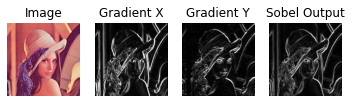

In [26]:
# Display all the resulting images:

show_with_plt(image, "Image",1)
show_with_plt(cv2.cvtColor(abs_gradient_x, cv2.COLOR_GRAY2BGR), "Gradient X", 2)
show_with_plt(cv2.cvtColor(abs_gradient_y, cv2.COLOR_GRAY2BGR), "Gradient Y", 3)
show_with_plt(cv2.cvtColor(sobel_image, cv2.COLOR_GRAY2BGR), "Sobel Output", 4)
